# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [5]:
# core libraries and viz.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# scaffolding
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay
import time

from sklearn import set_config
set_config(display="diagram")

import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Business Objecive

The business objective consist of leveraging the dataet supplied by a portuguese bank regarding past direct marketing campaign. Using this dataset, our goal is create a model capable of predicting the success of marketing campaign. The success in this case is define as the number of people accepting to purchase the product (a long-term deposit with good interest rates).

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

##### We can observe the following:  
- The dataset is complete and does not have any N/A or null numbers.  
- There are 10 Categorical and 10 numerical variables.  
- Within the Categorical Features we have 3 BINARY features: 'default', 'housing' , 'loan'  

As mentioned in the description of the variables the feature 'duration', does not help predict if the product will be sold as it is observed after selling the product. Hence, we will consider dropping this feature.

In [21]:
pd.option_context('mode.use_inf_as_na', True)

In [23]:
# FIlter the numerical columns
num_column_lst = []
for icol in df.columns:
    if df[icol].dtypes in ['float64', 'int64']:
        num_column_lst.append(icol)
print(num_column_lst)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Text(0.5, 1.05, 'Distribution Plot of Numerical Features')

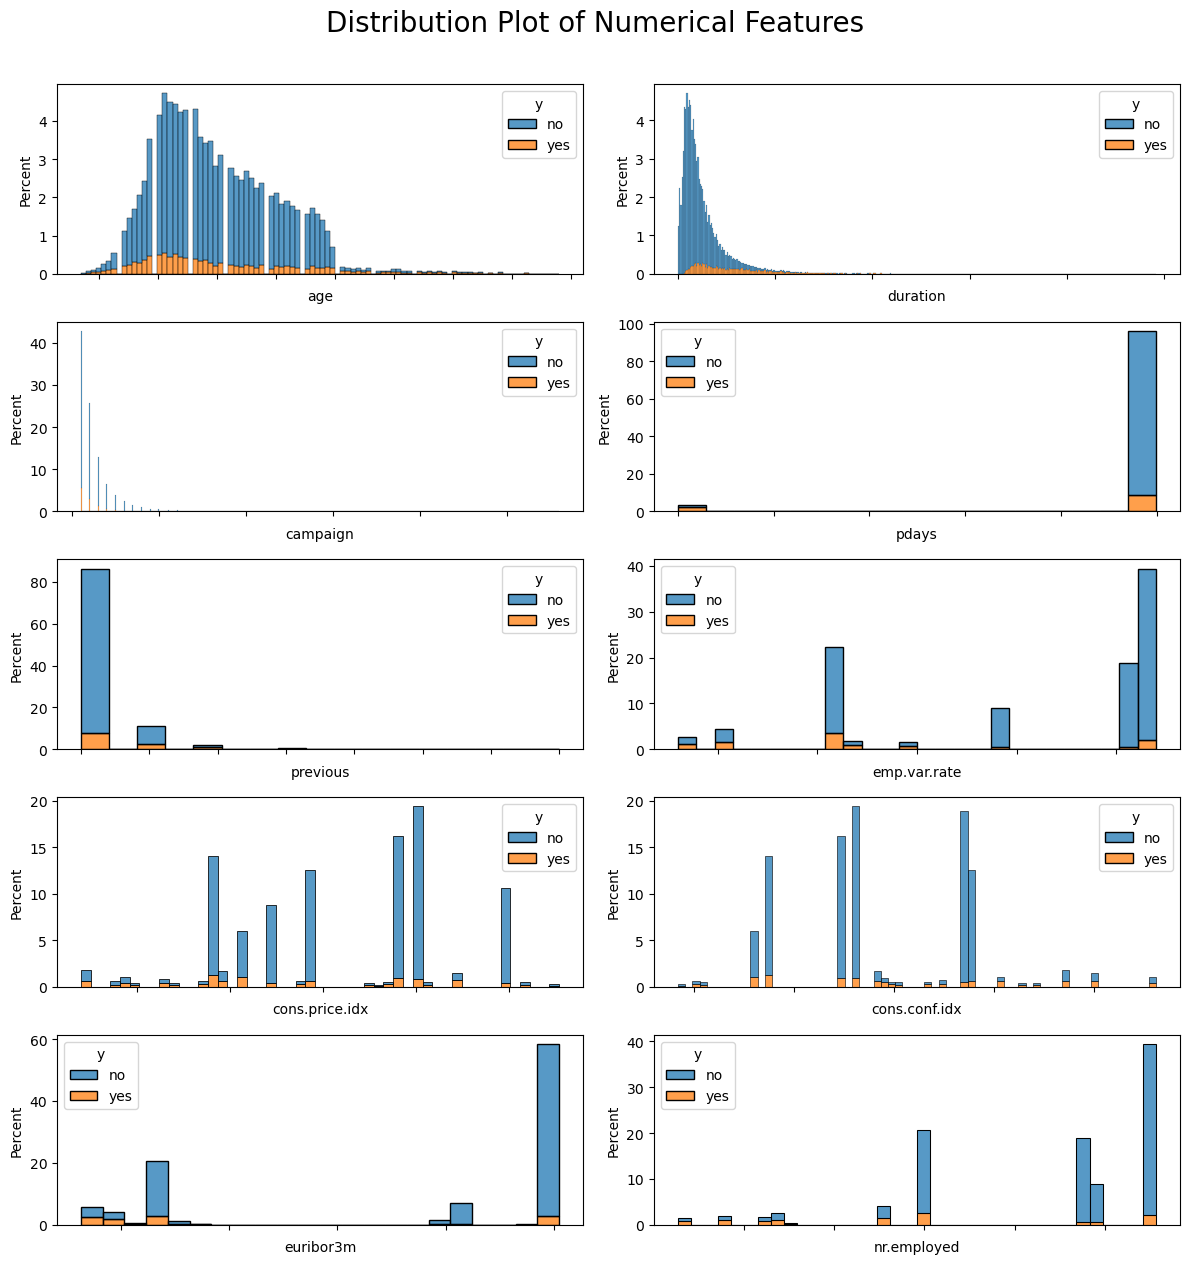

In [25]:
# Distribution Plot of the Numerical features 
fig, axs = plt.subplots(nrows = 5, ncols=2, figsize = (12,12))
for name,ax in zip(num_column_lst,axs.flatten()):
    
    sns.histplot(data=df,x=name,ax=ax,hue='y',multiple='stack',stat='percent')
    ax.set_xticklabels(ax.get_xticklabels(minor=True,which='minor'),rotation=0,fontsize=50)

fig.tight_layout()
fig.suptitle('Distribution Plot of Numerical Features',y=1.05,fontsize=20)

After review of the distribution. We can see that many distribution have skewed distributions which will need to be scaled.  

After further examining the 'pdays' feature, I believe it will be best to drop the variable as little significance will be extracted from this variable. Furthermore, previous contacts will be encapsulated by previous or campaign.  

##### We will look at the correlation across features

Text(0.5, 1.0, 'Correlation Matrix of the numerical features')

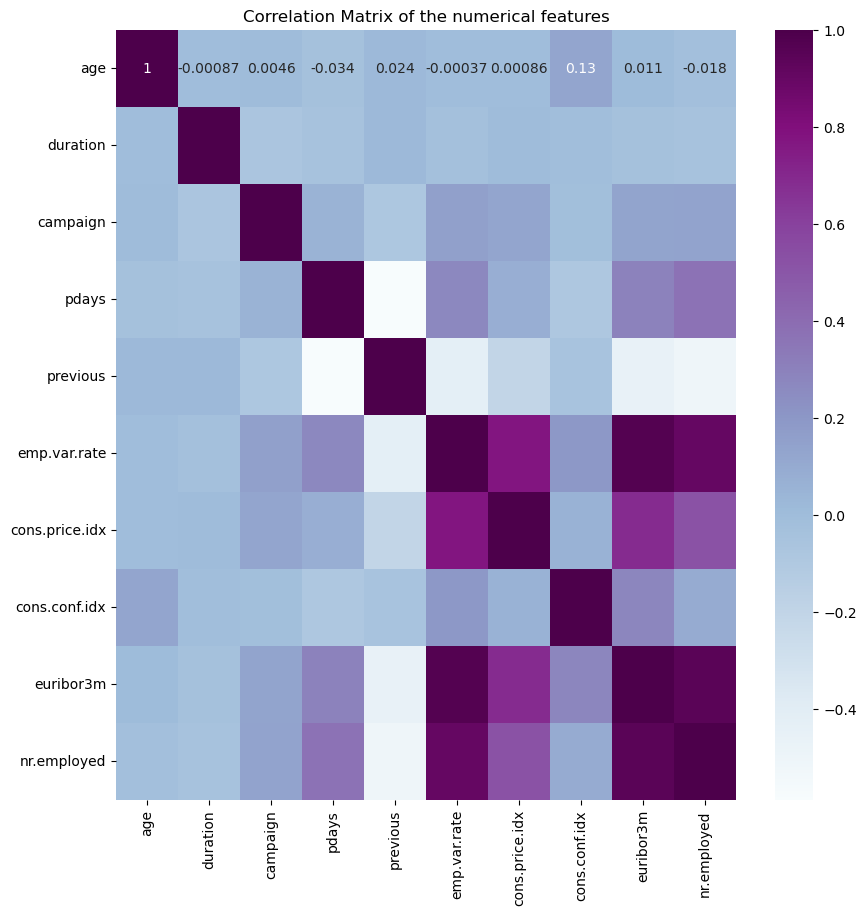

In [27]:
df_numeric = df[num_column_lst]
plt.figure(figsize=(10, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='BuPu')
plt.title('Correlation Matrix of the numerical features')

Text(0.5, 1.0, 'Pairplot of the numerical features')

<Figure size 1000x1000 with 0 Axes>

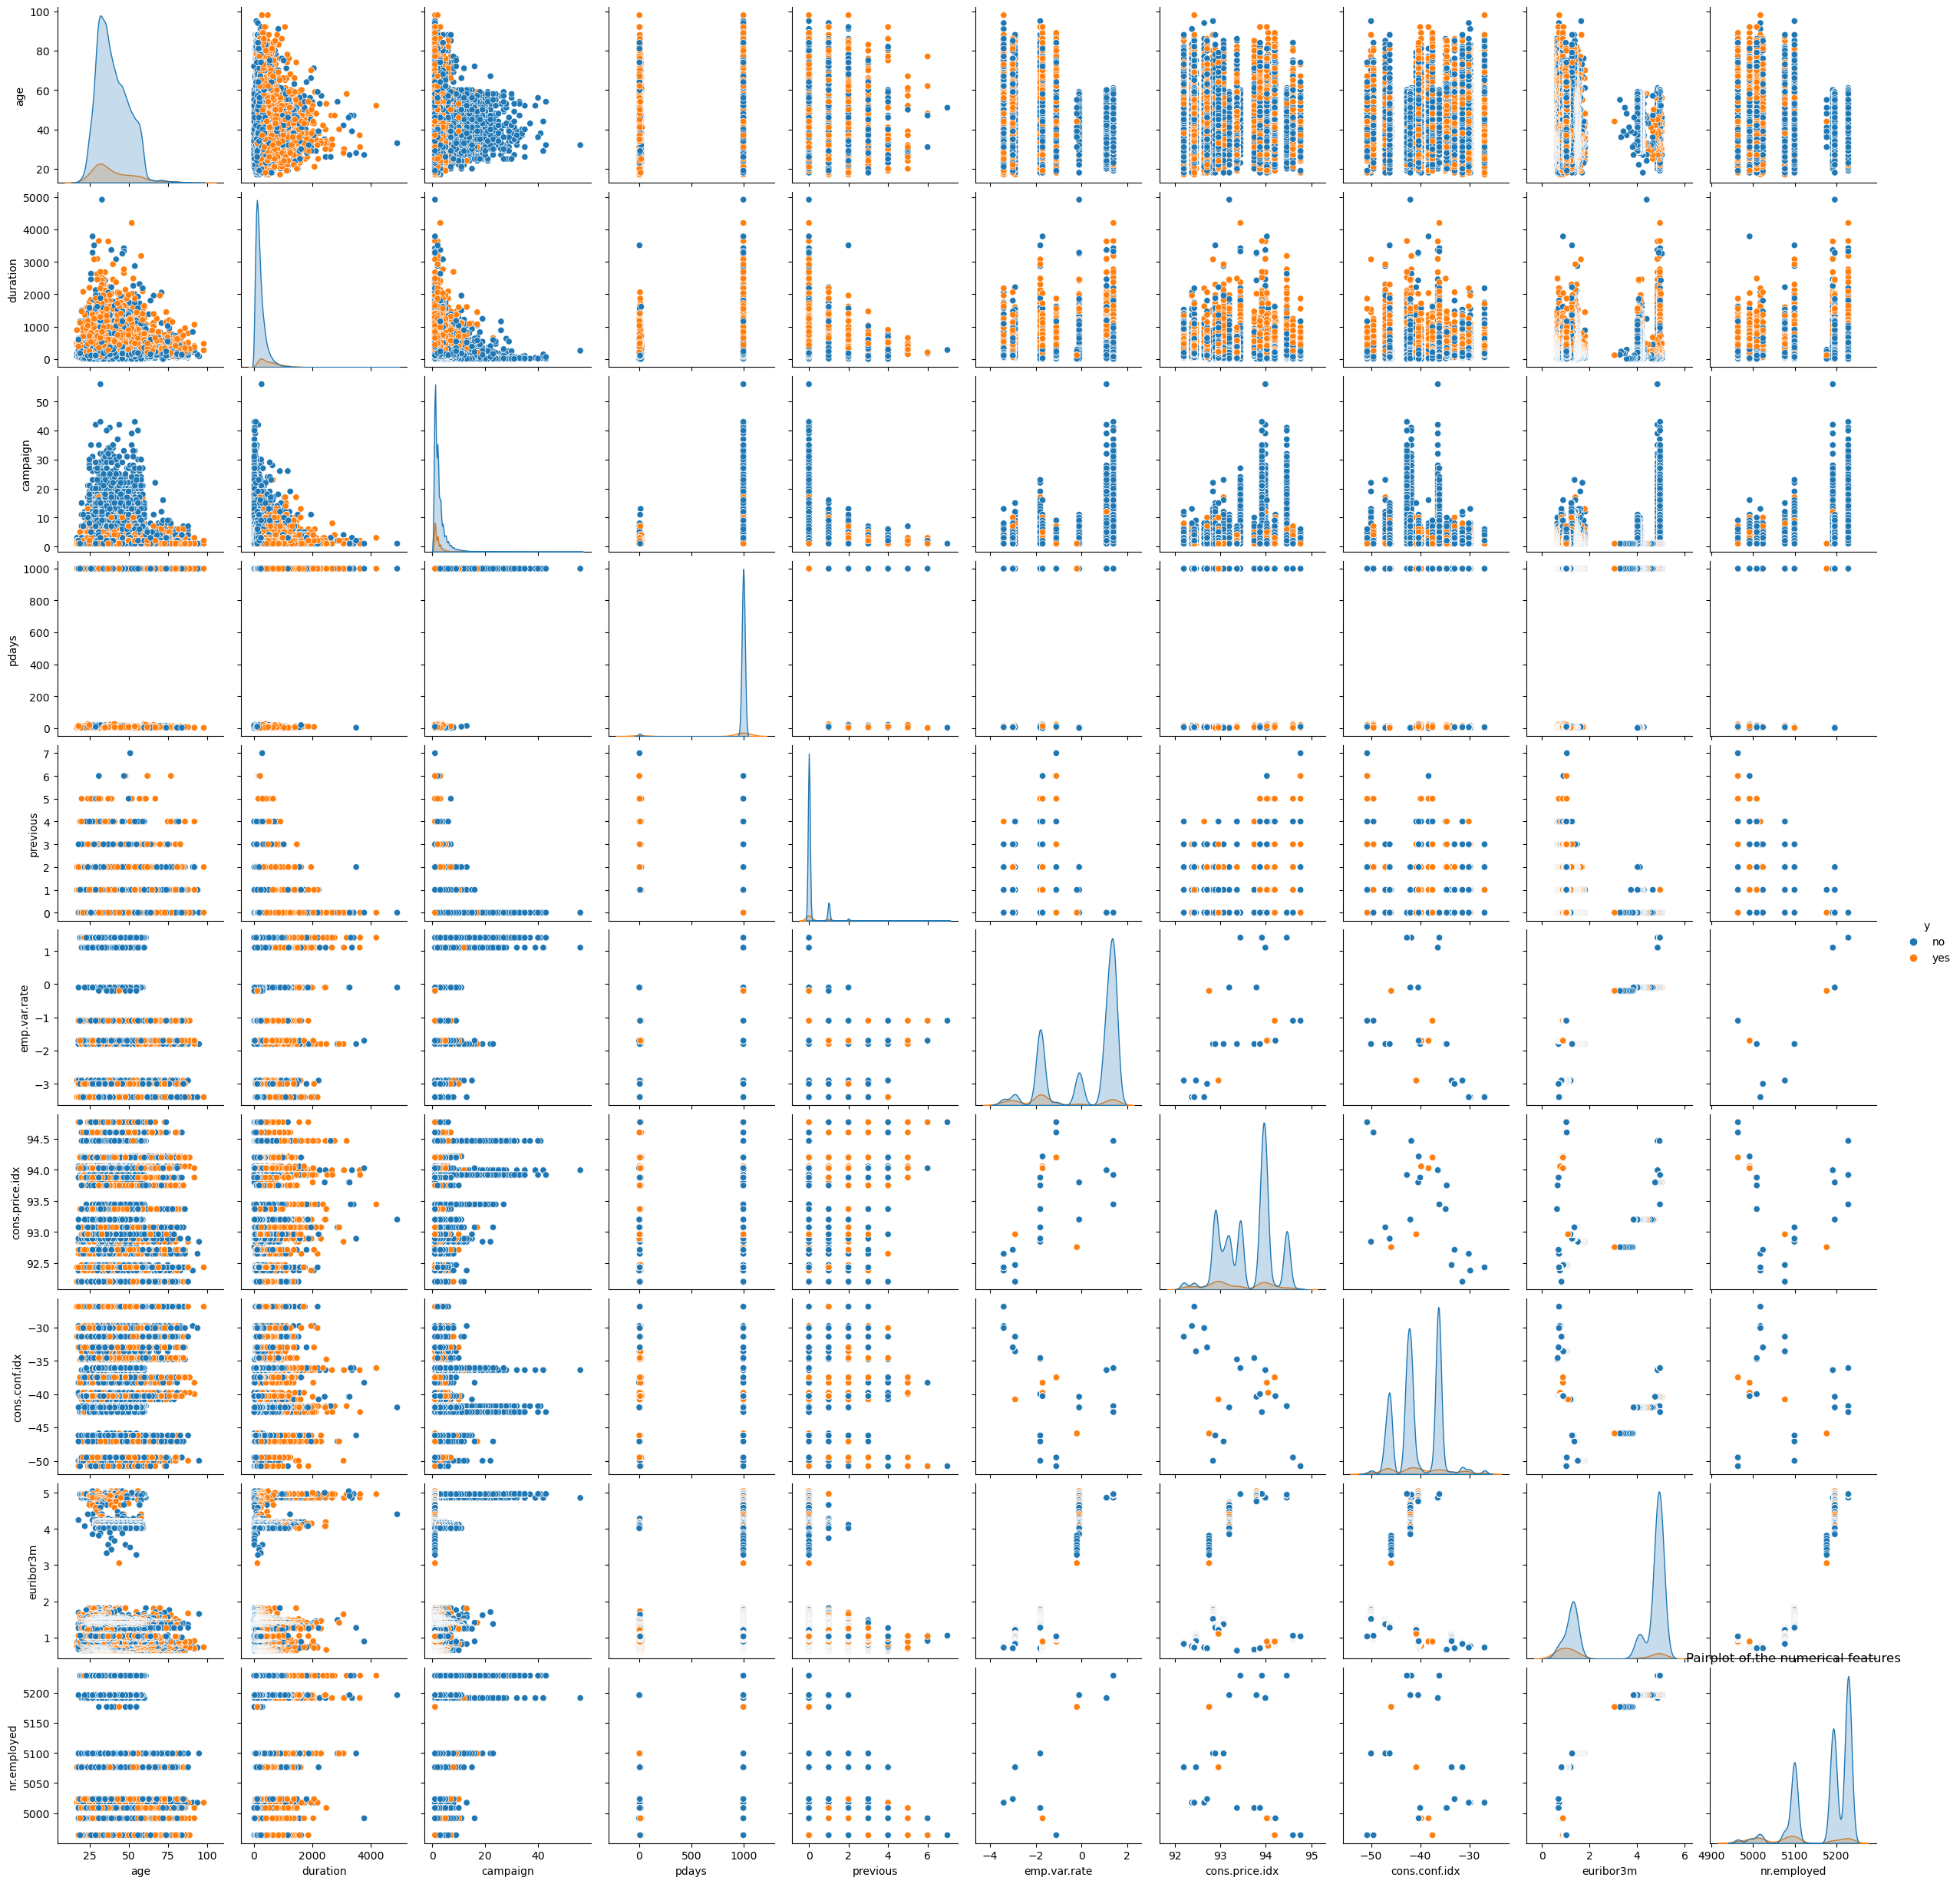

In [28]:
num_column_lst.append('y')
df_numeric_y = df[num_column_lst]
plt.figure(figsize=(10, 10))
sns.pairplot(data=df_numeric_y, hue='y')
plt.title('Pairplot of the numerical features')

As we can observe, there is high correlation between many macroeconomic variable.  
- For instance, by investigating the correlation between 'nr.employed' and 'emp.var.rate' we can see that a variable can be drop as one is simply the quarter delta of the other. Hence, we drop 'nr.employed'.  
- The relation between euribor3m and emp.var.rate is harder to understand as the an increase in average rates should not be in line with an increase in employment. On the contrary, it should coincide with decrease in employment. Similarly for the cons.price.idx. We will keep these variables for this instance as it may reflect a sample bias due to the economical cycle in which it was sampled. 

##### Numerical Features conclusion 
- Features considered being dropped: 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'nr.employed', 'cons.price.idx', 'euribor3m'
- drop: 'nr.employed, 'pdays'
- Further explore relation between cons.price.idx and the value of duration in a predictive model.


#### Categorical Features Investigation

In [30]:
# Distribution of the categorical features 
cat_column_lst = []
for icol in df.columns:
    if df[icol].dtypes in ['object']:
        cat_column_lst.append(icol)
print(cat_column_lst)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Text(0.5, 1.05, 'Distribution of Categorical variables')

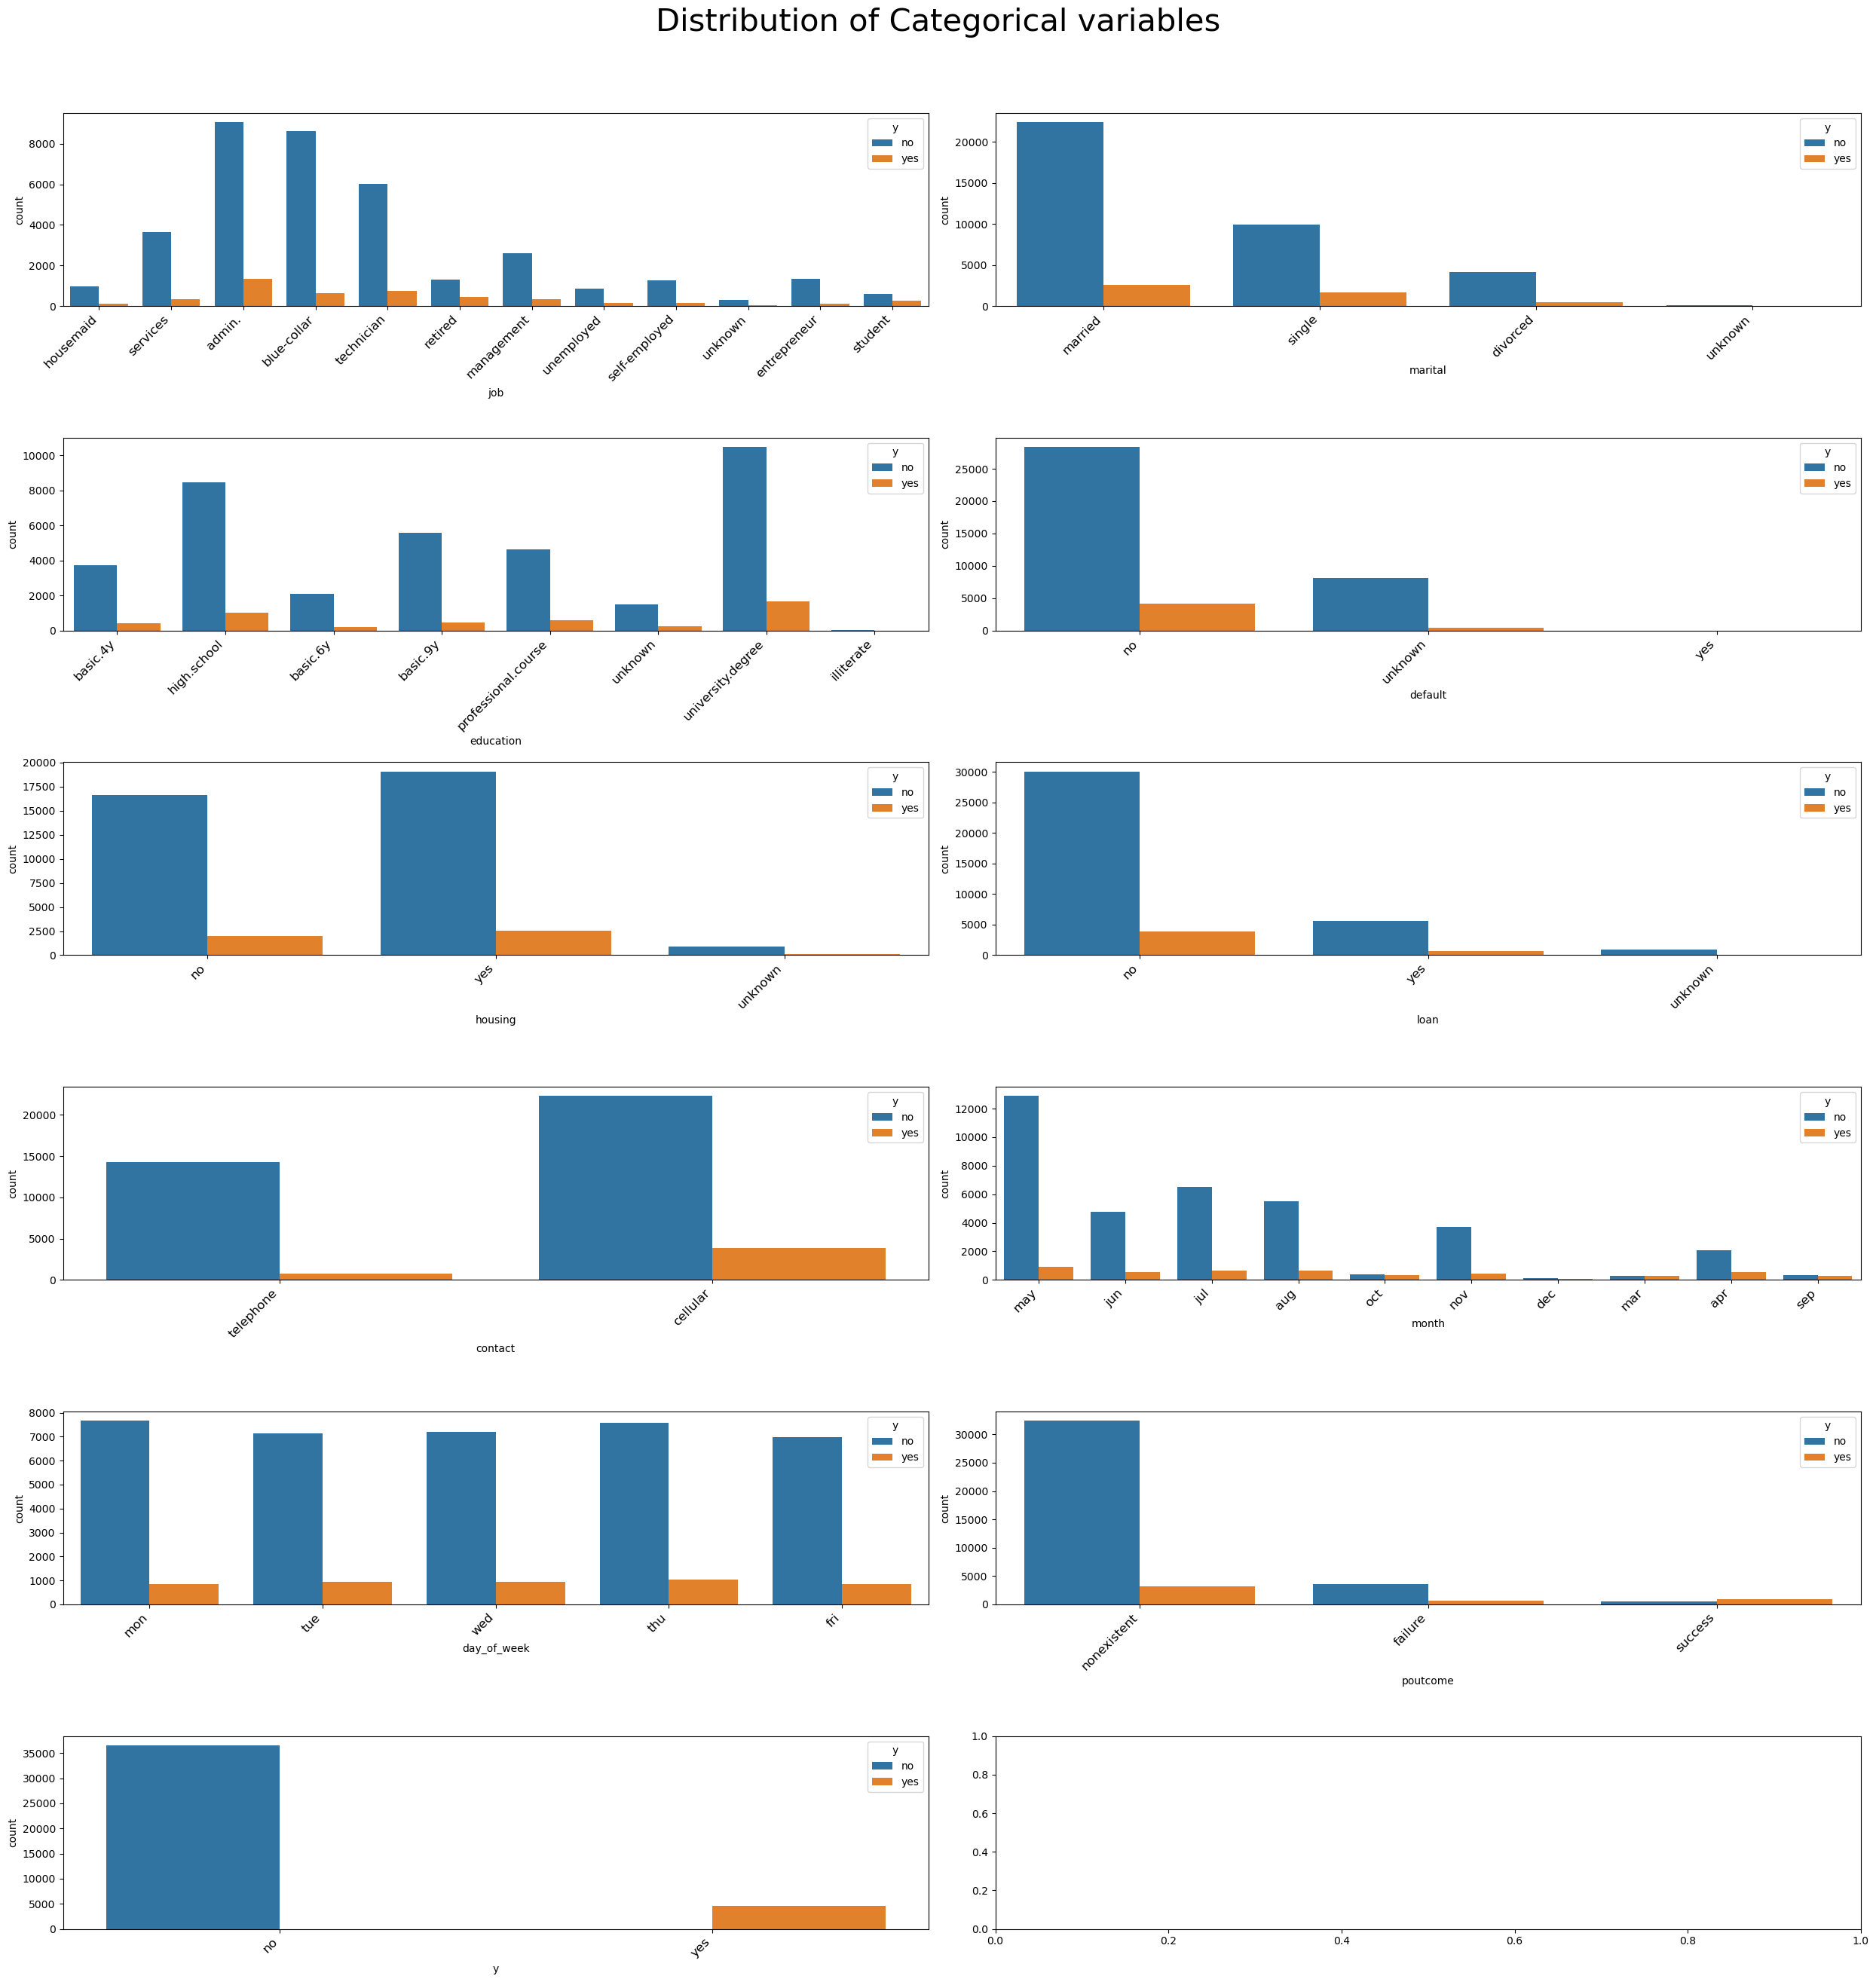

In [31]:
fig, axs = plt.subplots(nrows = 6, ncols=2, figsize = (25,25))
for name,ax in zip(cat_column_lst,axs.flatten()):
    sns.countplot(data=df,x=name,ax=ax,hue='y')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)

fig.tight_layout()
fig.suptitle('Distribution of Categorical variables',y=1.05,fontsize=30)

Observation of categorical variables:
- 'job': admin. blue-collar and technician represent a large proportion of the sample.
- 'marital': has almost no unknown datapoints. Married people have the lowest acceptance rate of all three categories.
- 'education': university is the most sampled education category.
- 'default': highest sampled is no with a relatively important category of unknown. 
- 'housing': most people outreached have house
- 'loan': most people outreached have no loans
- 'contact': most people were contacted through cellphones
- 'month': most people contacted were in May with October, December, March, September with almost all yes. This may provide an important when predicting in a model since the real conversion for the less sampled months can differ from those appearing in the dataset since there are less than 1,000 outreach during these months incontrast of nearly 14,000 may. The high conversion could be due to rescheduled calls or other factors to explore.  
- 'day_of_week': great sample relatively uniform across the days.
- 'poutcome': it seems that previous success outcomes are much more likely to accept the offer.

In [35]:
#Create Dataframe with the relevant features
df_final = df[['age','job','marital','education','default','housing','loan','y']]

print(df_final.shape)
df_final.head()

(41188, 8)


,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


In [36]:
#Label Encode y to obtain a Boolean
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_final.loc[:, 'y'] = le.fit_transform(df_final['y'])

df_final.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,0
1,57,services,married,high.school,unknown,no,no,0
2,37,services,married,high.school,no,yes,no,0
3,40,admin.,married,basic.6y,no,no,no,0
4,56,services,married,high.school,no,no,yes,0


In [37]:
# Create X & y by splitting the data into a 70/30 split
X = df_final.drop(columns = 'y')
y = df_final['y']
y = y.astype('int')

In [38]:
# We will create a column transformer to deal with the categorical data & Scale the numerical data
""" For the exception of age, all the columns are categorical and are non-binary (except y).
The features 'job','marital','education','default','housing' and 'loan' are not ordinal.
Hence, we will create a transformer using OneHotEncoder and fit it to the Dataframe"""

column_transformer = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), ['job', 'marital', 'education', 
                                       'default', 'education', 
                                       'housing', 'loan']),
    ([StandardScaler(), ['age']]),
    
    remainder='passthrough'
)


column_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['job', 'marital', 'education', 'default',
                                  'education', 'housing', 'loan']),
                                ('standardscaler', StandardScaler(), ['age'])])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [40]:
# Lets split the data in to train and test with 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [42]:
# create a df to keep track of scores and training time 

results_df = pd.DataFrame({'Baseline_Model': [],
                            'Simple_lgr': [],
                            'grid_lgr': [], 
                           'knn': [], 
                           'grid_knn': [],
                           'svm': [], 
                           'grid_svm': [],
                           'dtree': [],
                           'grid_dtree': []
                          }, 
                          columns=['ROC_AUC','Accuracy', 'F1', 'Precision', 'Recall', 'Fit Time'])

# Using a DummyClassifier with 'Most Frequent' or the mode as the prediction
dummy_clf = DummyClassifier(strategy = 'most_frequent')
start = time.time()
dummy_clf.fit(X_train, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['Baseline_Model', 'Fit Time'] = fit_time

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10968
           1       0.00      0.00      0.00      1389

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357

ROC_AUC Score for Baseline = 0.5
False Positive Rates:  [0. 1.]
True Positive Rates:  [0. 1.]


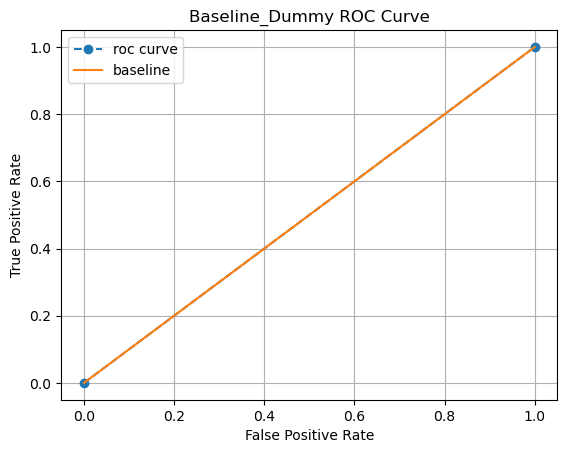

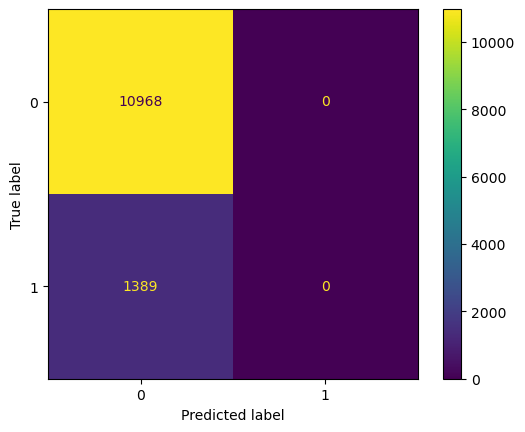

In [43]:
# Standardized Print out for all relevant scores and performance metrics

y_hat = dummy_clf.predict(X_test.values)
y_hat_probs = dummy_clf.predict_proba(X_test)
y_hat = y_hat.astype(np.int32)
y_test = y_test.astype(np.int32)
baseline_scores = classification_report(y_test, y_hat)
print(baseline_scores)

baseline_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for Baseline = {baseline_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('Baseline_Dummy ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['Baseline_Model', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['Baseline_Model', 'ROC_AUC'] = baseline_roc_score
results_df.loc['Baseline_Model', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['Baseline_Model', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['Baseline_Model', 'Recall'] = recall_score(y_test, y_hat)

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [45]:
# Using a Simple Logistic Regression with not parameter optimization
## Begin by column transform X_train & X_test
X_train_simple = column_transformer.transform(X_train)
X_test_simple = column_transformer.transform(X_test)

simple_lgr = LogisticRegression()

start = time.time()
simple_lgr.fit(X_train_simple, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['Simple_lgr', 'Fit Time'] = fit_time

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10968
           1       0.00      0.00      0.00      1389

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357

ROC_AUC Score for Simple Logistic Regressor = 0.6568874818242112
False Positive Rates:  [0.         0.         0.         0.00027352 0.0003647 ]
True Positive Rates:  [0.         0.00071994 0.00143988 0.00143988 0.00215983]


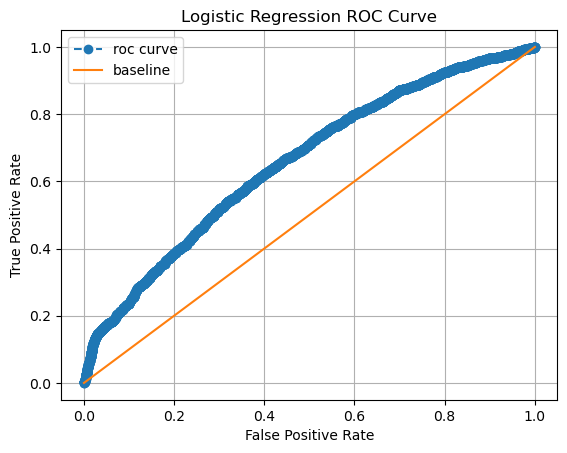

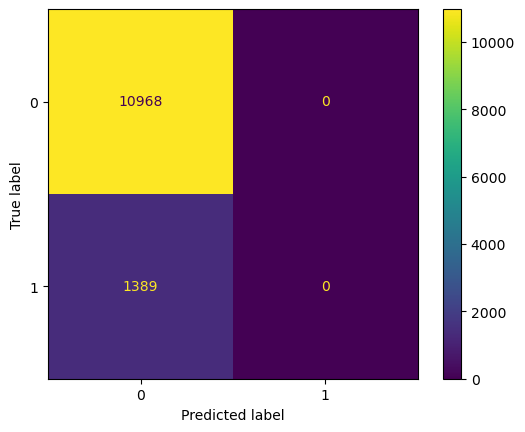

In [46]:
# print out all relevant scores and performance metrics

y_hat = simple_lgr.predict(X_test_simple)
y_hat_probs = simple_lgr.predict_proba(X_test_simple)

simple_lgr_scores = classification_report(y_test, y_hat)
print(simple_lgr_scores)

simple_lgr_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for Simple Logistic Regressor = {simple_lgr_roc_score}')


# display roc graph and confusion matrix
fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['Simple_lgr', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['Simple_lgr', 'ROC_AUC'] = simple_lgr_roc_score
results_df.loc['Simple_lgr', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['Simple_lgr', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['Simple_lgr', 'Recall'] = recall_score(y_test, y_hat)

### Problem 9: Accuracy of the model

What is the accuracy of the model?
The accuracy of default simple logistic regression mode is .89 and rest of the values are in the above table.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Building KNN, Decision Tree and SVC with default parameters and compare tieh the Logistic regression model

### KNN

In [50]:
knn_model = KNeighborsClassifier()
## Begin by column transform X_train & X_test
X_train_simple = column_transformer.transform(X_train)
X_test_simple = column_transformer.transform(X_test)
#Time the fitting of the model
start = time.time()
knn_model.fit(X_train_simple, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['knn', 'Fit Time'] = fit_time

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     10968
           1       0.29      0.06      0.11      1389

    accuracy                           0.88     12357
   macro avg       0.59      0.52      0.52     12357
weighted avg       0.82      0.88      0.84     12357

ROC_AUC Score for best KNN = 0.5748289808587742
False Positive Rates:  [0.         0.0003647  0.00246171 0.01969365 0.10029176]
True Positive Rates:  [0.         0.00071994 0.01223902 0.06407487 0.20662347]


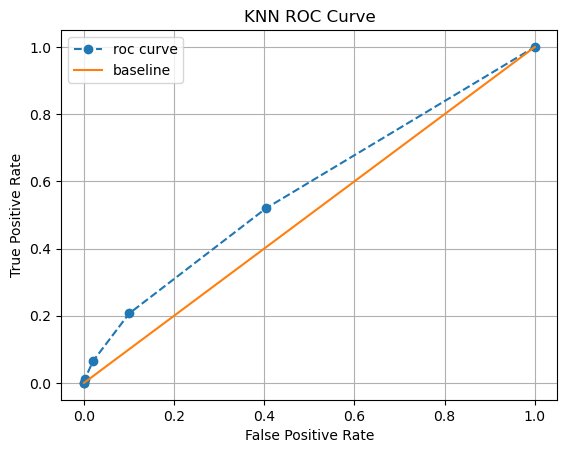

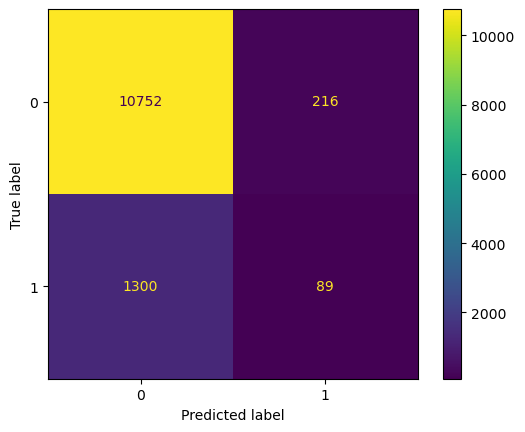

In [51]:
# print out all relevant scores and performance metrics

y_hat = knn_model.predict(X_test_simple)
y_hat_probs = knn_model.predict_proba(X_test_simple)

knn_scores = classification_report(y_test, y_hat)
print(knn_scores)

knn_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best KNN = {knn_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['knn', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['knn', 'ROC_AUC'] = knn_roc_score
results_df.loc['knn', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['knn', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['knn', 'Recall'] = recall_score(y_test, y_hat)

### SVC

In [53]:
svc_model = SVC(probability=True)
#Time the fitting of the model
start = time.time()
svc_model.fit(X_train_simple, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['svm', 'Fit Time'] = fit_time

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10968
           1       0.60      0.00      0.01      1389

    accuracy                           0.89     12357
   macro avg       0.74      0.50      0.47     12357
weighted avg       0.86      0.89      0.84     12357

ROC_AUC Score for best svm = 0.5544375377759714
False Positive Rates:  [0.        0.        0.        0.0003647 0.0003647]
True Positive Rates:  [0.         0.00071994 0.00431965 0.00431965 0.00647948]


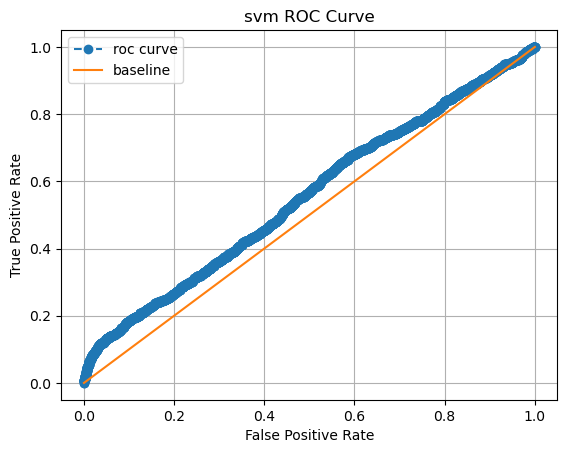

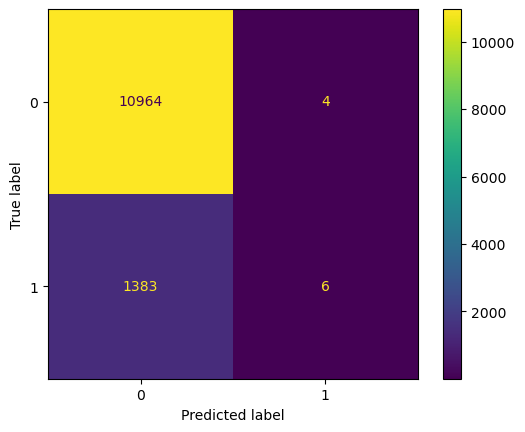

In [54]:
# print out all relevant scores and performance metrics

y_hat = svc_model.predict(X_test_simple)
y_hat_probs = svc_model.predict_proba(X_test_simple)

svc_scores = classification_report(y_test, y_hat)
print(svc_scores)

svc_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best svm = {svc_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('svm ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['svm', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['svm', 'ROC_AUC'] = svc_roc_score
results_df.loc['svm', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['svm', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['svm', 'Recall'] = recall_score(y_test, y_hat)

### Decision Tree

In [56]:
dtree_model = DecisionTreeClassifier()

#Time the fitting of the model
start = time.time()
dtree_model.fit(X_train_simple, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['dtree', 'Fit Time'] = fit_time

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     10968
           1       0.23      0.09      0.13      1389

    accuracy                           0.86     12357
   macro avg       0.56      0.53      0.53     12357
weighted avg       0.82      0.86      0.84     12357

ROC_AUC Score for best decision tree = 0.5756504359301147
False Positive Rates:  [0.         0.03519329 0.03528446 0.03564916 0.03574034]
True Positive Rates:  [0.         0.07343413 0.07415407 0.07703384 0.07775378]


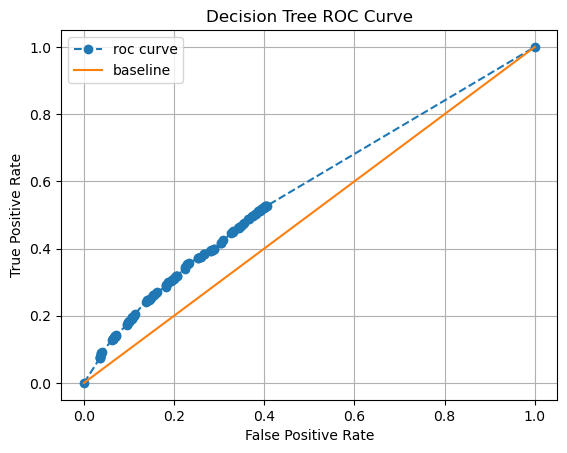

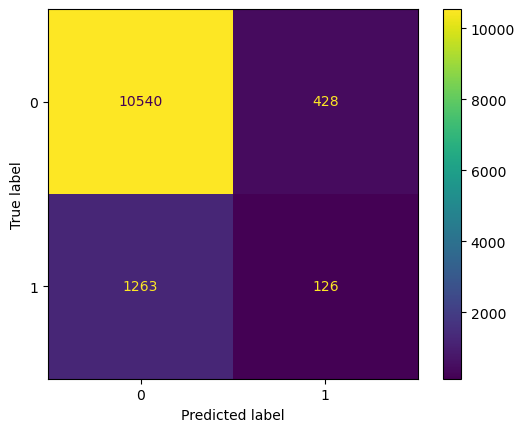

In [57]:
# print out all relevant scores and performance metrics

y_hat = dtree_model.predict(X_test_simple)
y_hat_probs = dtree_model.predict_proba(X_test_simple)

dtree_scores = classification_report(y_test, y_hat)
print(dtree_scores)

dtree_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best decision tree = {dtree_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('Decision Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['dtree', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['dtree', 'ROC_AUC'] = dtree_roc_score
results_df.loc['dtree', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['dtree', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['dtree', 'Recall'] = recall_score(y_test, y_hat)

### Now that we have created simple model without any parameter for all 4 classifiers lets list the scores

In [59]:
results_df

,ROC_AUC,Accuracy,F1,Precision,Recall,Fit Time
Baseline_Model,0.5,0.887594,0.0,0.0,0.0,0.0s
Simple_lgr,0.656887,0.887594,0.0,0.0,0.0,0.07s
knn,0.574829,0.877317,0.105077,0.291803,0.064075,0.0s
svm,0.554438,0.887756,0.008578,0.6,0.00432,110.95s
dtree,0.57565,0.863154,0.129696,0.227437,0.090713,0.18s


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Now lets add parameters and use gridsearch to improve the models

### GridSearchCV - LogisticRegression

In [62]:
# params we will do a grid search over
lgr_params = {'lgr__penalty': ['l1', 'l2', 'elasticnet']},

# pipeline which includes column transfomer, followed by model
lgr_pipe = Pipeline([
    ('columns', column_transformer),
    ('lgr', LogisticRegression(class_weight='balanced'))
])

# Create the grid search, train it and time it
lgr_grid = GridSearchCV(lgr_pipe, param_grid=lgr_params, scoring='roc_auc')

start = time.time()
lgr_grid.fit(X_train, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['grid_lgr', 'Fit Time'] = fit_time

Best parameters for Logistic Regression found during grid search={'lgr__penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.93      0.60      0.73     10968
           1       0.16      0.62      0.26      1389

    accuracy                           0.60     12357
   macro avg       0.54      0.61      0.49     12357
weighted avg       0.84      0.60      0.67     12357

ROC_AUC Score for best Logistic Regressor = 0.6553597047028361
False Positive Rates:  [0.         0.         0.00018235 0.00027352 0.00027352]
True Positive Rates:  [0.         0.00071994 0.00071994 0.00143988 0.00215983]


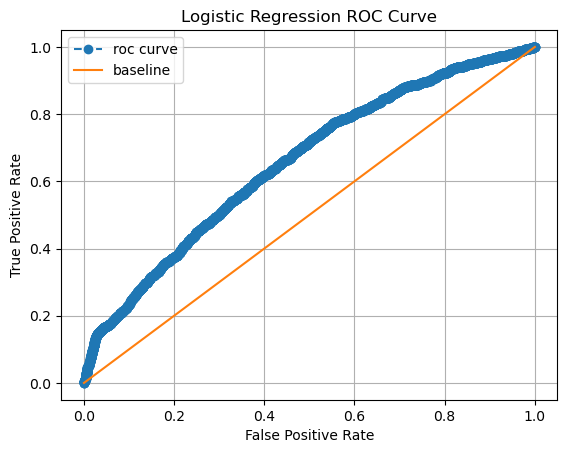

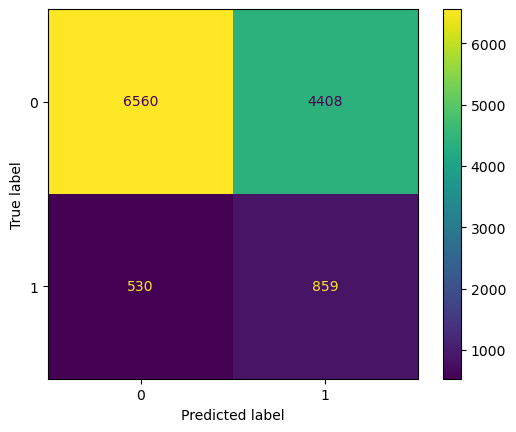

In [63]:
# print out all relevant scores and performance metrics

print(f'Best parameters for Logistic Regression found during grid search={lgr_grid.best_params_}')

y_hat = lgr_grid.predict(X_test)
y_hat_probs = lgr_grid.predict_proba(X_test)

lgr_scores = classification_report(y_test, y_hat)
print(lgr_scores)

lgr_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best Logistic Regressor = {lgr_roc_score}')


# display roc graph and confusion matrix
fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['grid_lgr', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['grid_lgr', 'ROC_AUC'] = lgr_roc_score
results_df.loc['grid_lgr', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['grid_lgr', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['grid_lgr', 'Recall'] = recall_score(y_test, y_hat)

### GridSearchCV KNN

In [86]:
# params we will do a grid search over

knn_params = {'knn__n_neighbors': list(range(1,10,1)),
              'knn__p': [1,2,3],
              'knn__weights': ['uniform', 'distance']}

# pipeline which includes column transfomer, followed by model
knn_pipe = Pipeline([
    ('columns', column_transformer),
    ('knn', KNeighborsClassifier())
])

# Create the grid search, train it and time it
knn_grid = GridSearchCV(knn_pipe, param_grid=knn_params, scoring='roc_auc')


#Time the fitting of the model
start = time.time()
knn_grid.fit(X_train, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['grid_knn', 'Fit Time'] = fit_time

Best parameters for knn found during grid search={'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10968
           1       0.40      0.04      0.07      1389

    accuracy                           0.89     12357
   macro avg       0.65      0.52      0.50     12357
weighted avg       0.84      0.89      0.84     12357

ROC_AUC Score for best KNN = 0.5957573284728032
False Positive Rates:  [0.         0.         0.00045587 0.00255288 0.00729395]
True Positive Rates:  [0.         0.00071994 0.00071994 0.01583873 0.03887689]


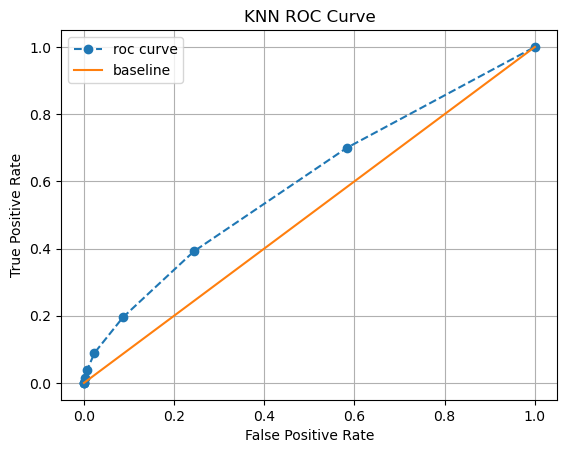

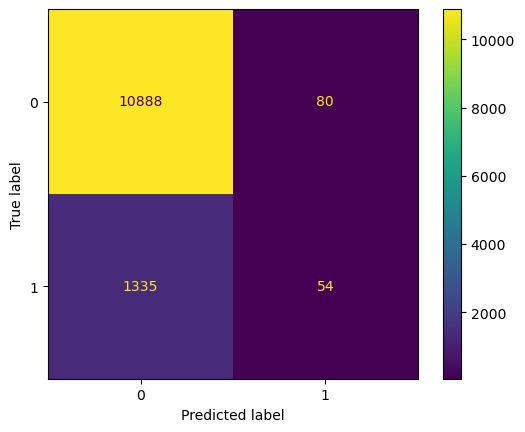

In [87]:
# print out all relevant scores and performance metrics

print(f'Best parameters for knn found during grid search={knn_grid.best_params_}')

y_hat = knn_grid.predict(X_test)
y_hat_probs = knn_grid.predict_proba(X_test)

knn_scores = classification_report(y_test, y_hat)
print(knn_scores)

knn_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best KNN = {knn_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['grid_knn', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['grid_knn', 'ROC_AUC'] = knn_roc_score
results_df.loc['grid_knn', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['grid_knn', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['grid_knn', 'Recall'] = recall_score(y_test, y_hat)

### GridSearchCV - SVM

In [90]:
#Since the runtime for SVC is very long, we will use smaller samples of the data
'''Since we have over 50,000 observation for SVM we will reduce our sample to a random sample of 1,000'''
import numpy

DF_svc = df_final.sample(1000, random_state = 42)

#Create the train and test dataset from the sample
X_svc = DF_svc.drop(columns = 'y')
y_svc = DF_svc['y']
y_svc = y_svc.astype('int')

X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_svc, y_svc, random_state = 42)

In [92]:


# params we will do a grid search over
svc_params = {'svc__kernel': ['poly', 'rbf', 'sigmoid'],
              'svc__degree': list(range(1, 4, 1)),
              'svc__gamma': [1,0.1,0.01,0.001],
              'svc__C': [0.1,1,10,100]}


# pipeline which includes column transfomer, followed by model
svc_pipe = Pipeline([
    ('columns', column_transformer),
    ('svc', SVC(class_weight='balanced', probability=True))
])


# Create the grid search, train it and time it
svc_grid = GridSearchCV(svc_pipe, param_grid=svc_params, scoring='roc_auc')


#Time the fitting of the model
start = time.time()
svc_grid.fit(X_train_svc, y_train_svc)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['grid_svm', 'Fit Time'] = fit_time

Best parameters for SVM found during grid search={'svc__C': 10, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       220
           1       0.26      0.50      0.34        30

    accuracy                           0.77       250
   macro avg       0.59      0.65      0.60       250
weighted avg       0.84      0.77      0.80       250

ROC_AUC Score for best svm = 0.5905303030303031
False Positive Rates:  [0.         0.00909091 0.00909091 0.01363636 0.09090909]
True Positive Rates:  [0.         0.         0.03333333 0.1        0.2       ]


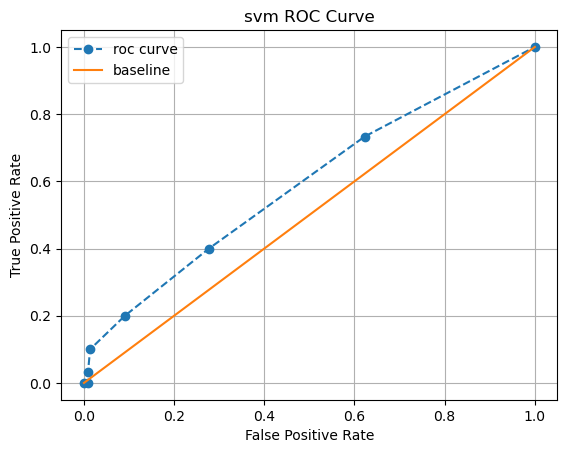

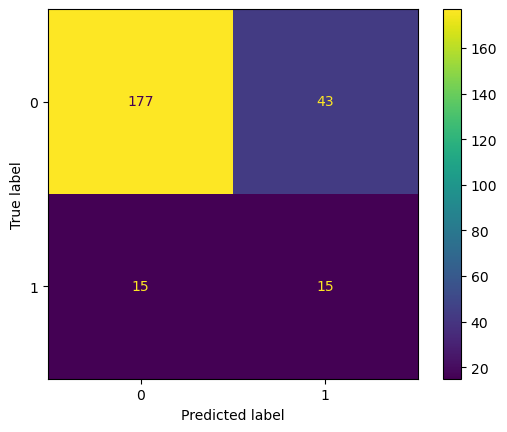

In [94]:
# print out all relevant scores and performance metrics

print(f'Best parameters for SVM found during grid search={svc_grid.best_params_}')

y_hat = svc_grid.predict(X_test_svc)
y_hat_probs = knn_grid.predict_proba(X_test_svc)

# y_hat = y_hat.astype(np.int32)
# y_test = y_test.astype(np.int32)

svc_scores = classification_report(y_test_svc, y_hat)
print(svc_scores)

svc_roc_score = roc_auc_score(y_test_svc, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best svm = {svc_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test_svc, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('svm ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test_svc, y_hat)

# add key results to results_df
results_df.loc['grid_svm', 'Accuracy'] = accuracy_score(y_test_svc, y_hat)
results_df.loc['grid_svm', 'ROC_AUC'] = svc_roc_score
results_df.loc['grid_svm', 'F1'] = f1_score(y_test_svc, y_hat)
results_df.loc['grid_svm', 'Precision'] = precision_score(y_test_svc, y_hat)
results_df.loc['grid_svm', 'Recall'] = recall_score(y_test_svc, y_hat)

### GridSearchCV DecisionTree

In [97]:
# params we will do a grid search over

dtree_params = {'dtree__max_depth': list(range(1, 11, 2)),
                'dtree__min_samples_split': list(range(2, 21, 1)),
                'dtree__criterion': ['entropy', 'gini'],
                'dtree__min_samples_leaf': list(range(2, 21, 2))}

# pipeline which includes column transfomer, followed by model
dtree_pipe = Pipeline([
    ('columns', column_transformer),
    ('dtree', DecisionTreeClassifier())
])

# Create the grid search, train it and time it
dtree_grid = GridSearchCV(dtree_pipe, param_grid=dtree_params, scoring='roc_auc')


#Time the fitting of the model
start = time.time()
dtree_grid.fit(X_train, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['grid_dtree', 'Fit Time'] = fit_time

Best parameters for Decision Tree found during grid search={'dtree__criterion': 'entropy', 'dtree__max_depth': 7, 'dtree__min_samples_leaf': 18, 'dtree__min_samples_split': 3}
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10968
           1       0.51      0.04      0.07      1389

    accuracy                           0.89     12357
   macro avg       0.70      0.52      0.50     12357
weighted avg       0.85      0.89      0.84     12357

ROC_AUC Score for best decision tree = 0.6421839972714656
False Positive Rates:  [0.         0.00027352 0.00045587 0.00100292 0.00173231]
True Positive Rates:  [0.         0.00431965 0.00647948 0.01007919 0.01439885]


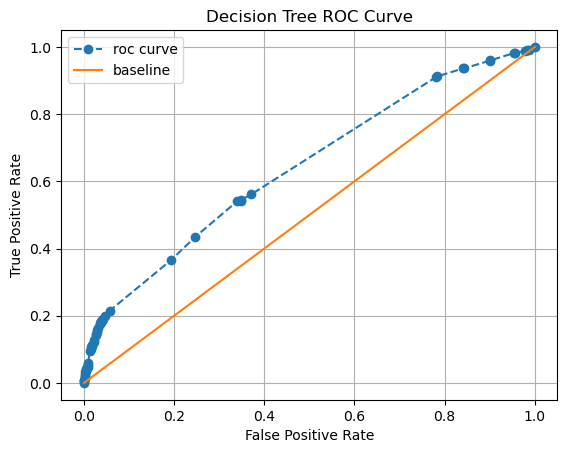

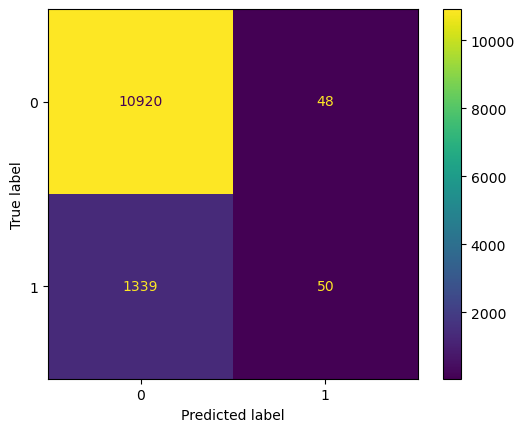

In [98]:
# print out all relevant scores and performance metrics

print(f'Best parameters for Decision Tree found during grid search={dtree_grid.best_params_}')

y_hat = dtree_grid.predict(X_test)
y_hat_probs = dtree_grid.predict_proba(X_test)

dtree_scores = classification_report(y_test, y_hat)
print(dtree_scores)

dtree_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best decision tree = {dtree_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('Decision Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['grid_dtree', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['grid_dtree', 'ROC_AUC'] = dtree_roc_score
results_df.loc['grid_dtree', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['grid_dtree', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['grid_dtree', 'Recall'] = recall_score(y_test, y_hat)

## Conclusion

In conclusion, the model we built yielded the following results:

#### Baseline model:
Our baseline model assumed that all outcomes would be 'no'. This model yielded an accuracy for 'no' of 89% or correctly identifying 'yes' if we did the contrary 11% of the time. Such baseline assumption would be wildly impractical since assuming 'no' to all outcomes would yield in no Telemarketing campaign and assuming 'yes' to all would require a lot of resources or at least as much as it currently does. Hence, we are looking for models capable of a better accuracy than 11% and an ROC_AUC greater than 0.5.

#### Simple Logistic Regression:
The simple logistic regression concluded with a similar result as the baseline model when we look at the confusion matrix. All predictions were classified as a 'no'. Hence, although the ROC_AUC was high the validity of the model in a business setting is null.

#### Logistic Regression:
The logistic regression offered a similar ROC_AUC score. Although the accuracy is much lower its confusion matrix shows a distinct prediction pattern. Furthermore the fit time remained very good. In addition, it offered the best F1 score.


#### KNN:
The KNN algorithm did not perform as well. Although the high accuracy of 89%, the ROC_AUC was of 59% which is below the logistic regression threshold. Conceptually, the KNN may struggle to perform well due to the high class imbalance which leads to nearest neighbors to be inacurate and not well clustered across yes and no.


#### SVM:
The SVM had to be performed on a subset of 5,000 datapoint and required extremely long fit time. For a subset of 10% of the data the gridsearch and fit time took over 100 minutes. For the impracticality of such model in real time and lackluster result, I do not believe such model to be optimal.


#### Decision Tree:
The decision tree offered a very similar ROC_AUC compared to the logistic regression. It required a lot of time to run but remained manageable. When we look at the F1 score, the decision tree clearly underperformed the logistic regression.



#### Choice of the Model:
For the reasons explained above, consider the results_df table, I would select a logistic regression as a predictive model. Although not perfect, it improves the chances of accurately identifying product purchasers for the telemarketing campaign.